# Guía 2.2 - Ejercicio 1.2 
## Imports y funciones
- La función calcular histogramas recibe un arreglo de imagenes y calcula el histograma para cada una de ellas.
- La función graficar_histogramas_subplots recibe un arreglo de histogramas y los grafica
- La función mostrar_imagenes recibe un arreglo de imagenes y las grafica sin más.

In [61]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def calcular_histogramas(imagenes):
    histogramas = []
    for img in imagenes:
        # Convierte la imagen a escala de grises si es a color
        if len(img.shape) == 3:
            img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
            
        hist, _ = np.histogram(img.flatten(), bins=256, range=(0, 256))
        histogramas.append(hist)
    return histogramas

def graficar_histogramas_subplots(histogramas):
    num_imagenes = len(histogramas)
    fig, axs = plt.subplots(1, num_imagenes, figsize=(6*num_imagenes, 6))

    for i, hist in enumerate(histogramas):
        axs[i].bar(range(256), hist, width=1, edgecolor='none')
        axs[i].set_xlim(-5, 260)
        axs[i].set_title(f"Histograma de Imagen {i+1}")
        axs[i].set_xlabel("Intensidad de píxeles")
        axs[i].set_ylabel("Frecuencia")

    plt.tight_layout()
    plt.show()


def mostrar_imagenes(imagenes):
    num_imagenes = len(imagenes)
    fig1, axs = plt.subplots(1, num_imagenes, figsize=(15, 5))
    
    for i, imagen in enumerate(imagenes):
        imagen_rgb = cv.cvtColor(imagen, cv.COLOR_BGR2RGB)  # Convertir la imagen a RGB para Matplotlib
        axs[i].imshow(imagen_rgb)
        axs[i].axis('off')  # Ocultar ejes
        
    plt.show()

## Lectura de las imágenes de los histogramas
Análisis de los histogramas para inferir a que imágenes corresponden.

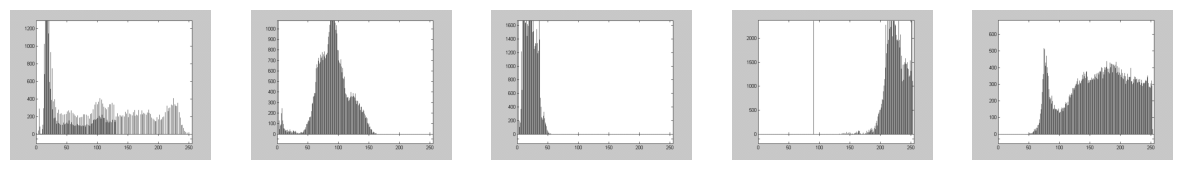

In [62]:
ruta1 = "Imagenes_Ej/histo1.tif"
ruta2 = "Imagenes_Ej/histo2.tif"
ruta3 = "Imagenes_Ej/histo3.tif"
ruta4 = "Imagenes_Ej/histo4.tif"
ruta5 = "Imagenes_Ej/histo5.tif"

histo1 = cv.imread(ruta1,cv.IMREAD_GRAYSCALE)
histo2 = cv.imread(ruta2,cv.IMREAD_GRAYSCALE)
histo3 = cv.imread(ruta3,cv.IMREAD_GRAYSCALE)
histo4 = cv.imread(ruta4,cv.IMREAD_GRAYSCALE)
histo5 = cv.imread(ruta5,cv.IMREAD_GRAYSCALE)


imagenes_histogramas = [histo1,histo2,histo3,histo4,histo5]

mostrar_imagenes(imagenes_histogramas)


### Conclusiones: 
- Imagen 1
    - Imagen oscura (muchos valores cercanos a 0)
- Imagen 2:
    - Mucha concentración de valores en la zona de los 100
- Imagen 3: 
    - Mucha concentración en la zona 0-50
- Imagen 4: 
    - Imagen muy clara
- Imagen 5:
    - Imagen más clara que oscura

## Vista de imágenes originales
A partir de las imágenes originales y los histogramas se intenta ver como se corresponden.

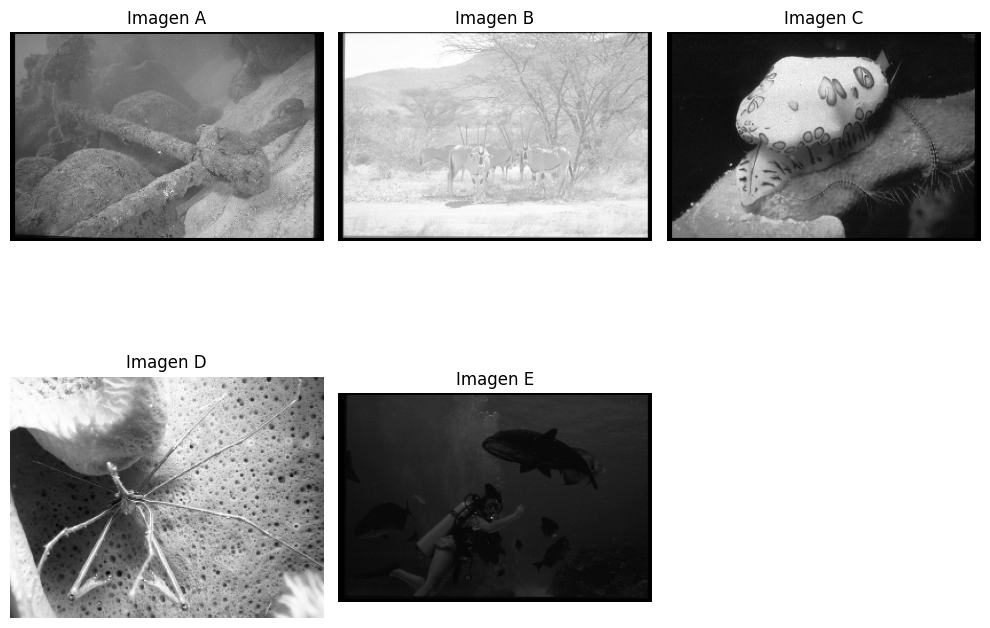

In [63]:
rutaA = "Imagenes_Ej/imagenA.tif"
rutaB = "Imagenes_Ej/imagenB.tif"
rutaC = "Imagenes_Ej/imagenC.tif"
rutaD = "Imagenes_Ej/imagenD.tif"
rutaE = "Imagenes_Ej/imagenE.tif"

imagenA = cv.imread(rutaA,cv.IMREAD_GRAYSCALE)
imagenB = cv.imread(rutaB, cv.IMREAD_GRAYSCALE)
imagenC = cv.imread(rutaC, cv.IMREAD_GRAYSCALE)
imagenD = cv.imread(rutaD,cv.IMREAD_GRAYSCALE)
imagenE = cv.imread(rutaE,cv.IMREAD_GRAYSCALE)

imagenes_originales = [imagenA, imagenB, imagenC, imagenD, imagenE]


plt.figure(figsize=(10, 8))

plt.subplot(2, 3, 1)
plt.imshow(imagenA, cmap='gray')
plt.title('Imagen A')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(imagenB, cmap='gray')
plt.title('Imagen B')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(imagenC, cmap='gray')
plt.title('Imagen C')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(imagenD, cmap='gray')
plt.title('Imagen D')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(imagenE, cmap='gray')
plt.title('Imagen E')
plt.axis('off')

plt.tight_layout()

plt.show()


### Conclusiones
- IMAGEN A: histo2
    - Corresponde al histograma 2 ya que no contiene ni muchos valores claros, ni muchos oscuros. 
- IMAGEN B: histo4
    - Es la imagen más clara, por lo tanto, debe corresponder al histograma 4
- IMAGEN D: histo5
    - Es la segunda imagen con más valores cercanos al 255, por lo tanto, debe corresponder al segundo histograma más claro
- IMAGEN C: histo1
    - Encaja con el histograma 1, ya que múltiples valores muy cercanos a 0 y algunos claros
- IMAGEN E: histo3
    - Es la imagen más oscura, por lo tanto, debe corresponder al histograma 3

### Mostrar histogramas de imágenes originales y comprobar con nuestras respuestas

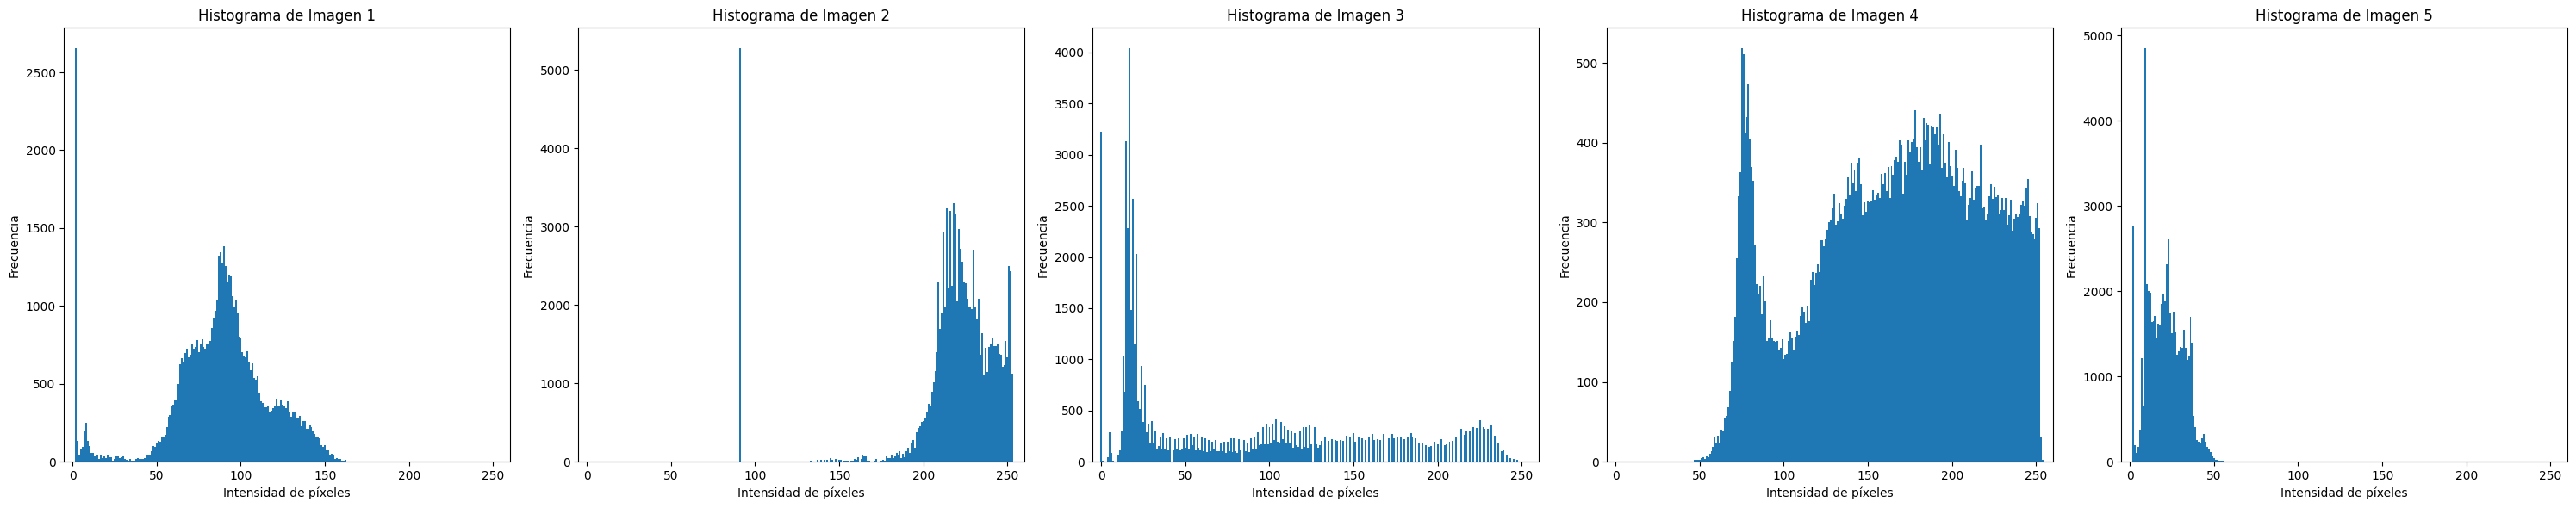

In [64]:
histogramas = calcular_histogramas(imagenes_originales)
graficar_histogramas_subplots(histogramas)

### Comprobación
- Imagen1 -> histo2 (bien)
- Imagen2 -> histo4 (bien)
- Imagen3 -> histo1 (bien)
- Imagen4 -> histo5 (bien)
- Imagen5 -> histo3 (bien)

## Obtención de media, varianza, asimetría, energía y entropía

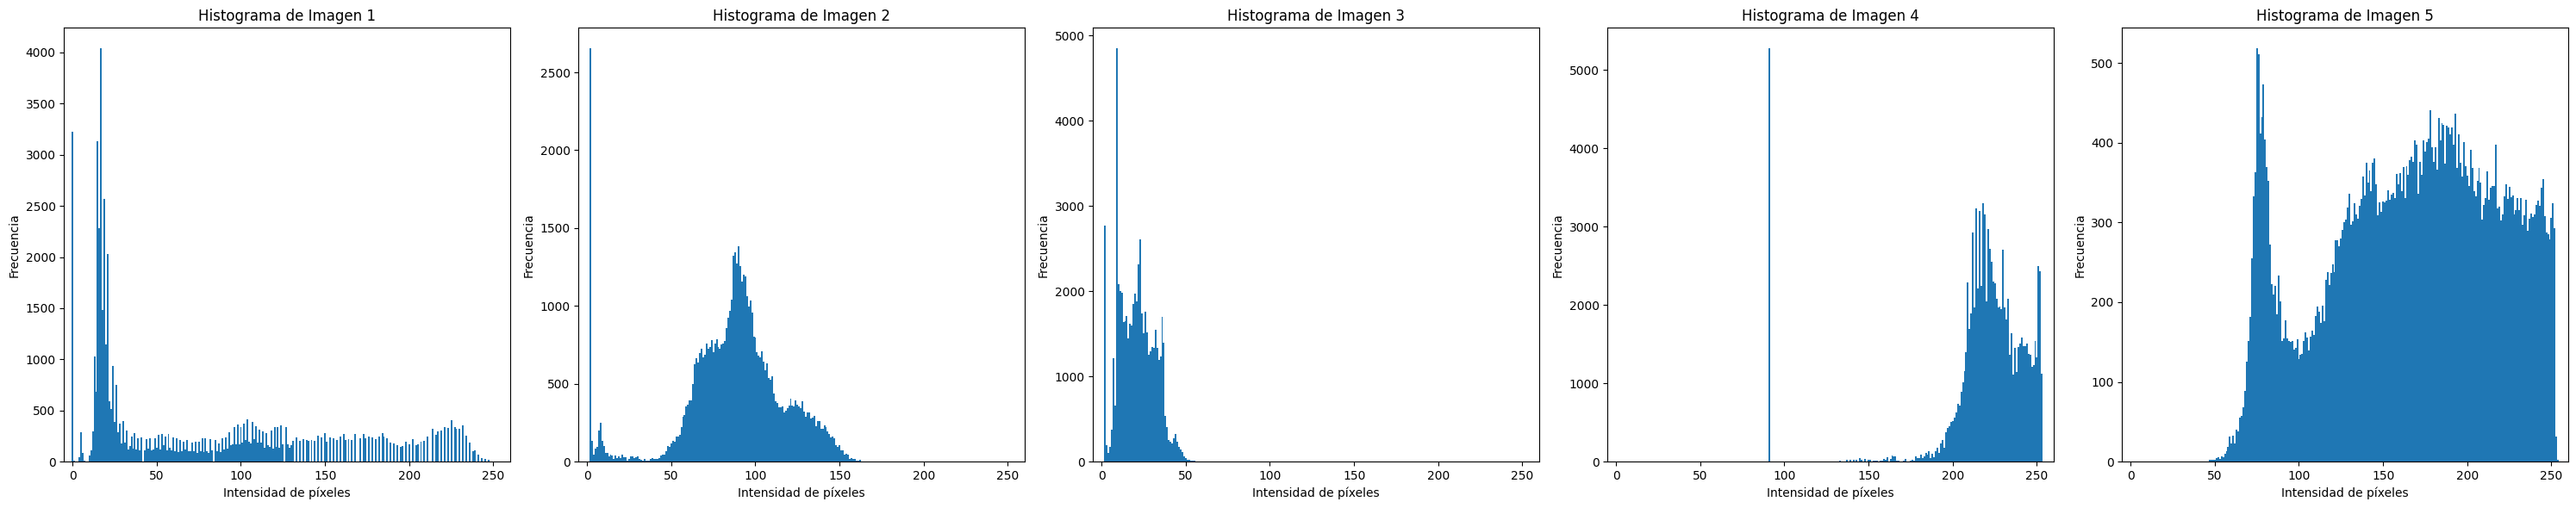

In [65]:
# Se debe cambiar el orden de los histogramas en funcíon de los histogramas originales
histogramas = [histogramas[2],histogramas[0],histogramas[4],histogramas[1],histogramas[3]]
graficar_histogramas_subplots(histogramas)

### Gráficos comparativos de los valores obtenidos por histograma

Media: 77.65936666666667
Varianza: 5079.120102265556
Asimetría: 0.7898584820538416
Energía: 0.018945780555555555
Entropía: 6.739286370663344 

Media: 87.22526666666667
Varianza: 1010.3694215955555
Asimetría: -0.7897857256688604
Energía: 0.013274011666666667
Entropía: 6.592177208743449 

Media: 20.882833333333334
Varianza: 114.57553863888889
Asimetría: 0.33879743275200264
Energía: 0.031839816666666666
Entropía: 5.203148076024687 

Media: 218.15032771535581
Varianza: 1089.3545270461607
Asimetría: -2.738374783842111
Energía: 0.02021855142448344
Entropía: 5.861619066382181 

Media: 165.94364686754074
Varianza: 2663.7415228403925
Asimetría: -0.24055661454593108
Energía: 0.005723708895869296
Entropía: 7.510771765040146 



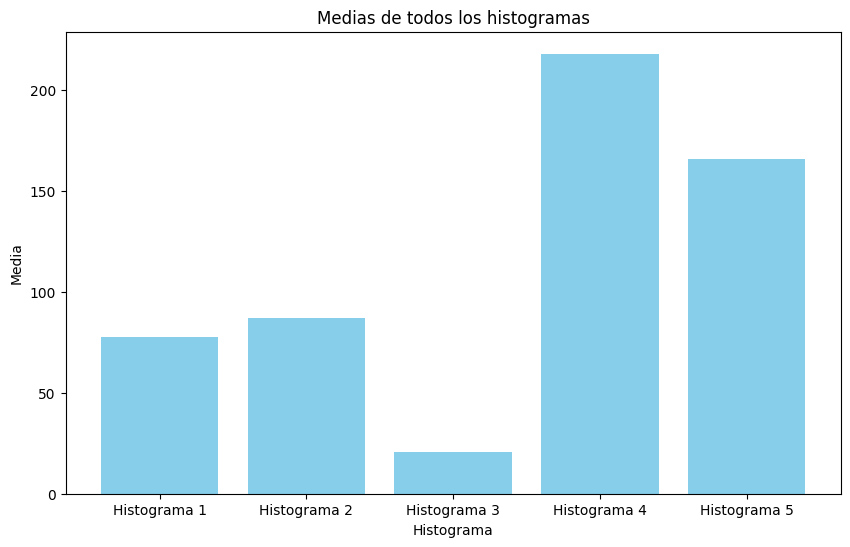

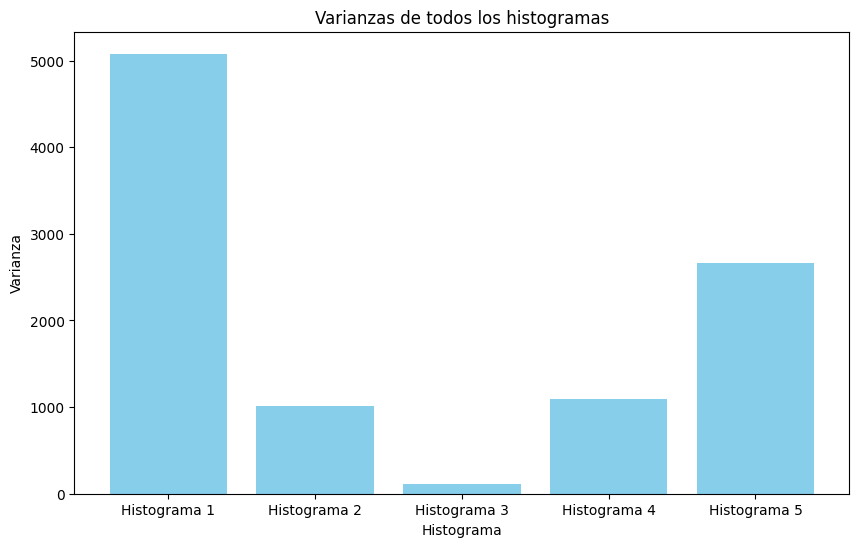

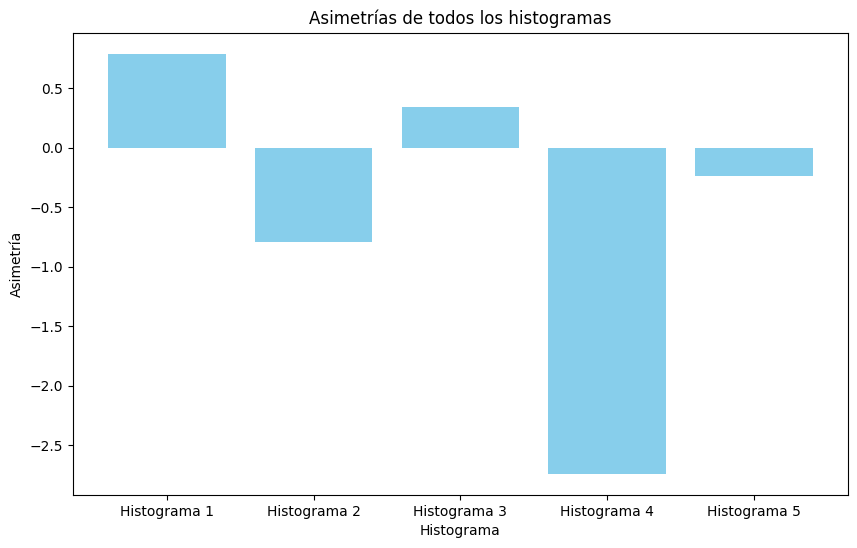

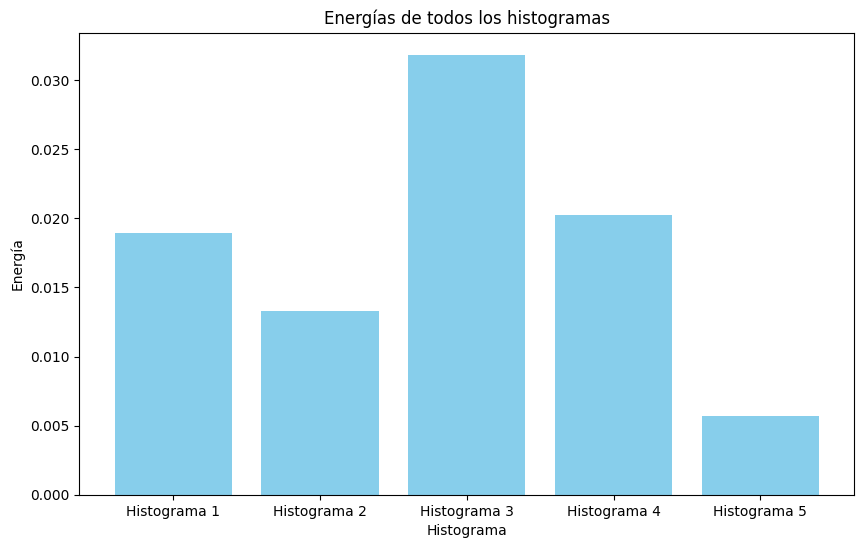

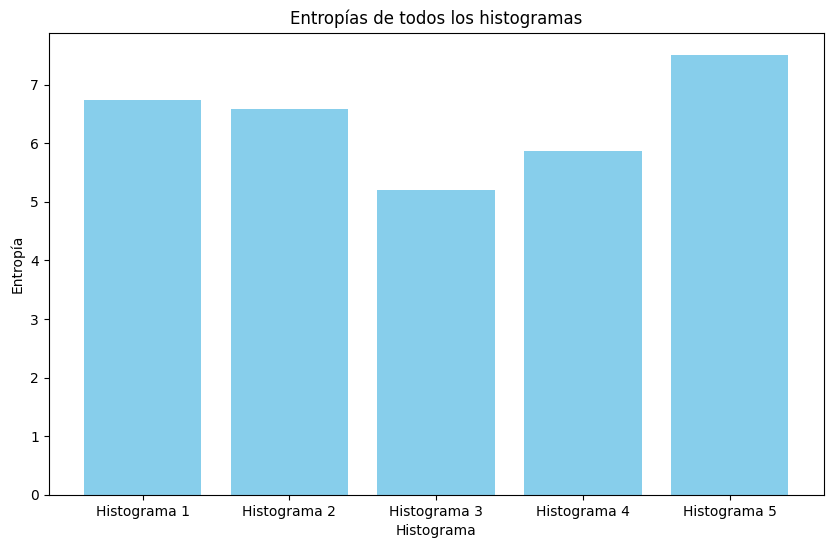

In [66]:
medias_histogramas = []
varianzas_histogramas = []
asimetrias_histogramas = []
energias_histogramas = []
entropias_histogramas = []

for histograma in histogramas:
    total_pixeles = np.sum(histograma)
    suma_productos = np.sum(histograma * np.arange(256))
    
    #Promedio
    promedio_histograma = suma_productos / total_pixeles

    #Varianza
    distancia_cuadrada = (np.arange(256) - promedio_histograma) ** 2
    suma_varianza = np.sum(histograma * distancia_cuadrada)
    varianza_histograma = suma_varianza / total_pixeles

    #asimetria 
    distancia_cubo = (np.arange(256) - promedio_histograma) ** 3
    suma_asimetria = np.sum(histograma * distancia_cubo)
    asimetria_histograma = suma_asimetria / (total_pixeles * (varianza_histograma ** 1.5))

    # Energía
    histograma_normalizado = histograma / total_pixeles
    energia_histograma = np.sum(histograma_normalizado ** 2)

    # Entropía
    entropia_histograma = -np.sum(histograma_normalizado * np.log2(histograma_normalizado + 1e-10))
    
    print(f"Media: {promedio_histograma}") #Brillo medio de la imagen
    print(f"Varianza: {varianza_histograma}")#Contraste
    print(f"Asimetría: {asimetria_histograma}")
    print(f"Energía: {energia_histograma}") #Distribucióin niveles de grises
    print(f"Entropía: {entropia_histograma} \n") 
    
    medias_histogramas.append(promedio_histograma)
    varianzas_histogramas.append(varianza_histograma)
    asimetrias_histogramas.append(asimetria_histograma)
    energias_histogramas.append(energia_histograma)
    entropias_histogramas.append(entropia_histograma)


plt.figure(figsize=(10, 6))
plt.bar(range(len(medias_histogramas)), medias_histogramas, color='skyblue')
plt.title('Medias de todos los histogramas')
plt.xlabel('Histograma')
plt.ylabel('Media')
plt.xticks(range(len(medias_histogramas)), [f'Histograma {i+1}' for i in range(len(medias_histogramas))])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(varianzas_histogramas)), varianzas_histogramas, color='skyblue')
plt.title('Varianzas de todos los histogramas')
plt.xlabel('Histograma')
plt.ylabel('Varianza')
plt.xticks(range(len(varianzas_histogramas)), [f'Histograma {i+1}' for i in range(len(varianzas_histogramas))])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(asimetrias_histogramas)), asimetrias_histogramas, color='skyblue')
plt.title('Asimetrías de todos los histogramas')
plt.xlabel('Histograma')
plt.ylabel('Asimetría')
plt.xticks(range(len(asimetrias_histogramas)), [f'Histograma {i+1}' for i in range(len(asimetrias_histogramas))])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(energias_histogramas)), energias_histogramas, color='skyblue')
plt.title('Energías de todos los histogramas')
plt.xlabel('Histograma')
plt.ylabel('Energía')
plt.xticks(range(len(energias_histogramas)), [f'Histograma {i+1}' for i in range(len(energias_histogramas))])
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(range(len(entropias_histogramas)), entropias_histogramas, color='skyblue')
plt.title('Entropías de todos los histogramas')
plt.xlabel('Histograma')
plt.ylabel('Entropía')
plt.xticks(range(len(entropias_histogramas)), [f'Histograma {i+1}' for i in range(len(entropias_histogramas))])
plt.show()

### Conclusiones
- Media: Es el brillo promedio de la imagen, nos da a entender los cambios entre luminosidad entre imágenes. 
    - Por ejemplo: se observa como el cuarto histograma es el de mayor brillo medio, por lo tanto, el más claro.
- Varianza: Nos da la dispersión en la distribución de niveles de gris.
    - Por ejemplo: Obtenemos la varianza más alta en el segundo histograma, ya que es, a simple vista, la que tiene más dispersos los valores de grises.
- Asimetría: Mide la simetría de la distribución de los niveles de grises. Una asimetría positiva indica que la distribución tiene una cola más larga hacia la derecha y una concentración más alta en la cola izquierda, mientras que una negativa indica lo contrario: una cola más larga hacia la izquierda y una concentración más alta en la cola derecha.
    - Por ejemplo: Obtenemos la asimetría más baja en el histograma 4, ya que tiene muchos valores concentrados en la derecha y cola más larga hacia la izquierda.
- Energía: Mide la homogeneidad de la distribución de los niveles de gris. Valores más cercanos a 0 muestran una distribución más heterogénea, mientras que más cercanos a 1 indican una distribución más homogénea.
    - Por ejemplo: Obtenemos la energía más alta en el histograma 3, ya que todos los valores están muy concentrados en la zona entre 0 y 50.
- Entropía: Medida de la incertidumbre en la distribución de los niveles de gris. Valores más altos indican mayor incertidumbre, es decir, una distribución de los niveles de gris más uniforme.
    - Por ejemplo: Se observa que la quinta imagen es la que tiene más entropía, mostrando que es la más uniforme.